In [8]:
import numpy as np

In [9]:
x = [x for x in range( 10)]
y =np.array([0,0,0,1,1,0,0,0,1,1])
x

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [10]:
y

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 1])

In [11]:
# F0 首先它的预测值

F0 = np.log(sum(y)/sum(1-y))
F0

np.float64(-0.40546510810816444)

In [12]:
# 预测值概率话
P0 = 1/(1+np.exp(-F0))
P0

np.float64(0.4)

In [13]:
y1=y-P0
y1

array([-0.4, -0.4, -0.4,  0.6,  0.6, -0.4, -0.4, -0.4,  0.6,  0.6])

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



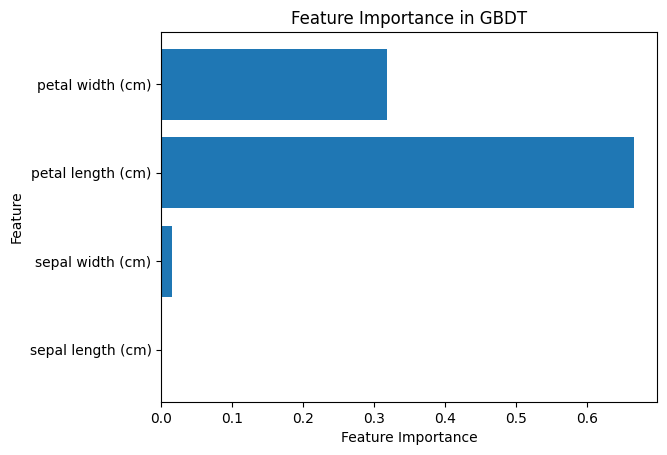

In [14]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1. 加载鸢尾花数据集
iris = load_iris()
X, y = iris.data, iris.target

# 2. 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. 初始化和训练 GBDT 分类模型
gbdt = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42,loss="log_loss")
gbdt.fit(X_train, y_train)

# 4. 模型预测
y_pred = gbdt.predict(X_test)

# 5. 模型评估
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# 可选：查看特征重要性
import matplotlib.pyplot as plt

plt.barh(range(X.shape[1]), gbdt.feature_importances_)
plt.yticks(range(X.shape[1]), iris.feature_names)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance in GBDT")
plt.show()
